In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Data

In [2]:
loan_df = pd.read_csv("../Data/loan.csv")
loan_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:
loan_df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# Exploratory Data Analysis

### Distribution of Applicant Income

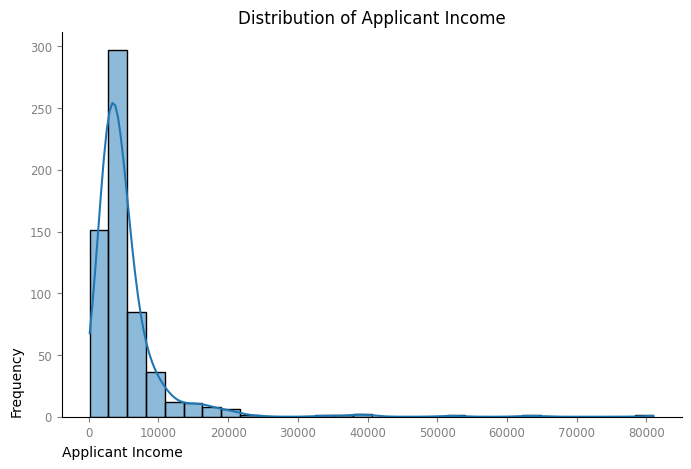

In [4]:
fig , ax = plt.subplots(figsize=(8,5))

sns.histplot(loan_df['ApplicantIncome'], kde=True, bins=30)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")


plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income', loc="left")
plt.ylabel('Frequency', loc="bottom")
plt.show()

# fig.savefig('../Plots/Distribution of Applicant Income.png',dpi=300, bbox_inches='tight')


Interpretation:

- The strong right skew indicates the presence of income outliers, which could influence model performance if not normalized or capped.

- The majority of applicants belong to the lower-income segment, implying that loan products might be targeting middle- to low-income individuals.

- Log transformation or scaling may be beneficial for better model fitting and variance stabilization in predictive analysis.

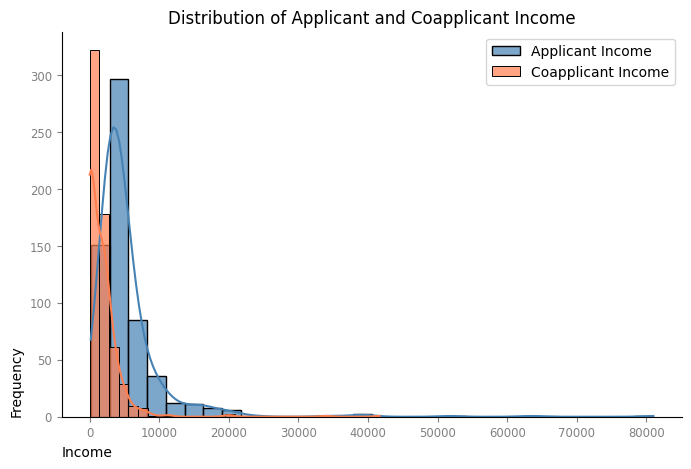

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# Plot ApplicantIncome first (more opaque)
sns.histplot(loan_df['ApplicantIncome'], kde=True, bins=30, color='steelblue', alpha=0.7, label='Applicant Income')
# Plot CoapplicantIncome on top (slightly transparent)
sns.histplot(loan_df['CoapplicantIncome'], kde=True, bins=30, color='coral', alpha=0.7, label='Coapplicant Income')

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")

plt.title('Distribution of Applicant and Coapplicant Income')
plt.xlabel('Income', loc="left")
plt.ylabel('Frequency', loc="bottom")
plt.legend()
plt.show()

# fig.savefig('../Plots/Distribution of Applicant and Coapplicant Income.png',dpi=300, bbox_inches='tight')


### Loan Status by Gender

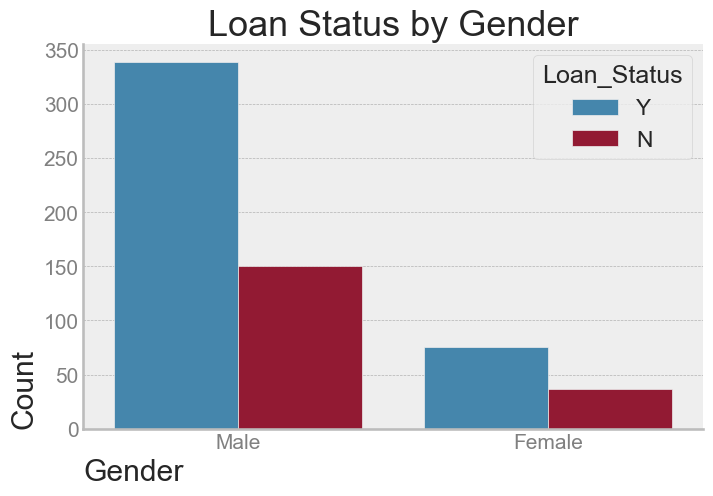

In [54]:
fig , ax = plt.subplots(figsize=(8,5))

sns.countplot(x='Gender', hue='Loan_Status', data=loan_df)
plt.style.use("bmh")

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")

plt.title('Loan Status by Gender')
plt.xlabel('Gender', loc="left")
plt.ylabel('Count', loc="bottom")
plt.show()

# fig.savefig('../Plots/Loan Status by Gender.png',dpi=300, bbox_inches='tight')

Interpretation:

- Gender imbalance is evident in the applicant pool — there are significantly more male applicants.

- The loan approval rate appears somewhat consistent across genders, though males show a slightly higher absolute count of approvals, likely due to higher representation.

### Loan Status by Property Area

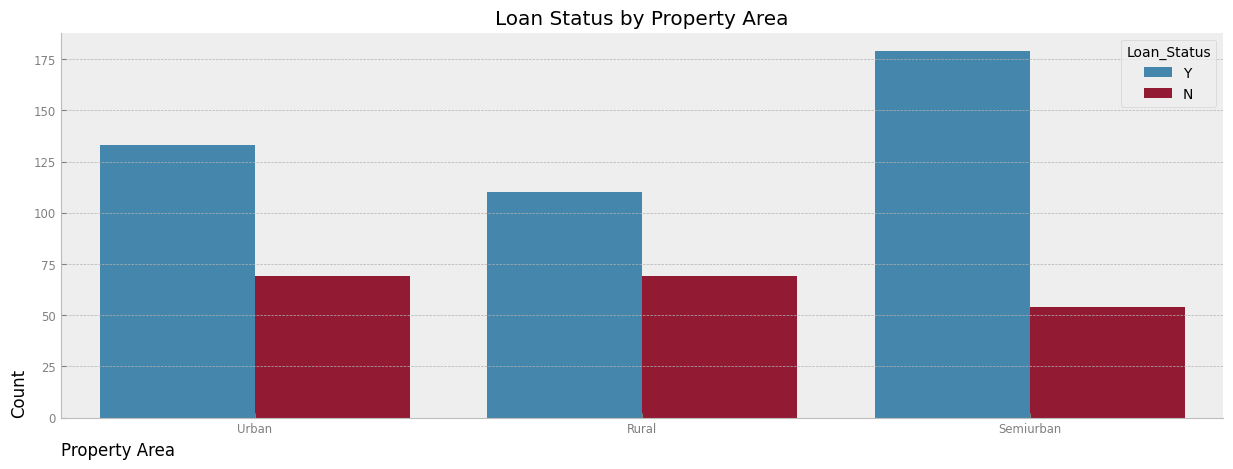

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_df)

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")

plt.title('Loan Status by Property Area')
plt.xlabel('Property Area', loc="left")
plt.ylabel('Count', loc="bottom")
plt.show()

# fig.savefig('../Plots/Loan Status by Property Area.png',dpi=300, bbox_inches='tight')

Interpretation:

- Semiurban areas may represent the most financially stable demographic in this dataset, possibly due to better employment opportunities or stronger repayment profiles.

- Rural areas show a comparatively higher rejection rate, which might be due to less formal employment, weaker financial documentation, or risk perceptions.

# Feature Analysis

In [7]:
loan_df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [8]:
loan_df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [9]:
loan_df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

### Applicant Income Boxplot

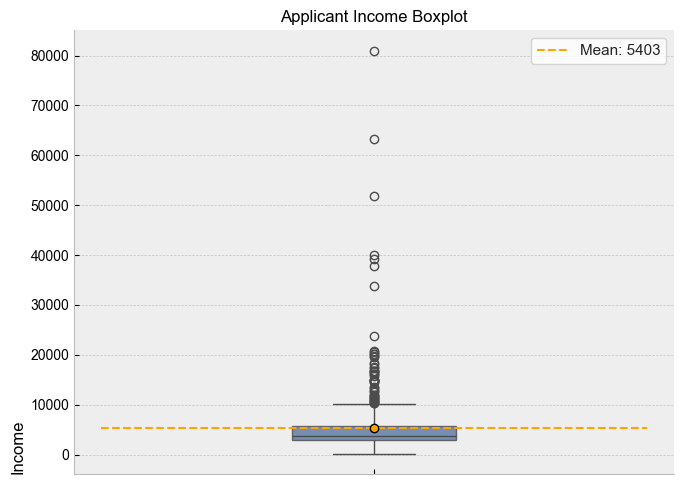

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")

sns.boxplot(
    y=loan_df["ApplicantIncome"],
    ax=ax,
    color="#4C72B0",
    width=0.3,
    boxprops=dict(alpha=0.8),
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "orange", "markeredgecolor": "black"},
)

ax.spines[["right", "top"]].set_visible(False)

mean_income = loan_df["ApplicantIncome"].mean()
ax.hlines(
    mean_income,
    linestyles="dashed",
    xmin=-0.5,  
    xmax=0.5,
    color="orange",
    label=f"Mean: {mean_income:.0f}"
)

ax.set_title("Applicant Income Boxplot")
ax.set_xlabel("")  
ax.set_ylabel("Income", loc="bottom")
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()
plt.tight_layout()
plt.show()


# fig.savefig('../Plots/ApplicantIncome Boxplot.png',dpi=300, bbox_inches='tight')

###  Applicant Income Boxplot Summary

- **Distribution Shape:** The data is **right-skewed**, meaning most applicants have moderate incomes while a few have very high incomes.
- **Central Tendency:** The **median** income lies well below the **mean**, confirming the presence of skewness.
- **Outliers:** Several **high-income outliers** are visible beyond the upper whisker, representing applicants with unusually large earnings.
- **Spread:** The interquartile range (IQR) indicates moderate variability among typical applicants, but the extreme values significantly stretch the overall scale.

###  Interpretation

- The skewness and outliers suggest that the variable is **not normally distributed**.
- The **mean** is higher than the **median**, which may affect models sensitive to non-normal features.
- Before modeling, it’s advisable to apply **scaling or transformation**to reduce skewness and mitigate outlier effects.

### Coapplicant Income Boxplot

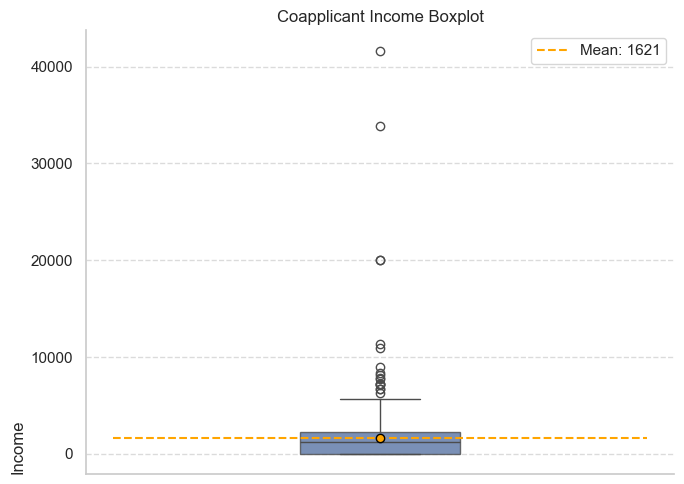

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")

sns.boxplot(
    y=loan_df["CoapplicantIncome"],
    ax=ax,
    color="#4C72B0",
    width=0.3,
    boxprops=dict(alpha=0.8),
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "orange", "markeredgecolor": "black"},
)

ax.spines[["right", "top"]].set_visible(False)

mean_income = loan_df["CoapplicantIncome"].mean()
ax.hlines(
    mean_income,
    linestyles="dashed",
    xmin=-0.5,  
    xmax=0.5,
    color="orange",
    label=f"Mean: {mean_income:.0f}"
)

ax.set_title("Coapplicant Income Boxplot")
ax.set_xlabel("") 
ax.set_ylabel("Income", loc="bottom")
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()
plt.tight_layout()
plt.show()


# fig.savefig('../Plots/CoapplicantIncome Boxplot.png',dpi=300, bbox_inches='tight')

###  Coapplicant Income Boxplot Summary

- **Distribution Shape:** The distribution is **highly right-skewed**, with most co-applicants earning low or zero income and a few having much higher values.
- **Central Tendency:** The **median** income is close to zero, while the **mean** (orange dashed line) lies noticeably higher, reflecting the influence of a small number of high-income co-applicants.
- **Outliers:** There are multiple **extreme outliers** above the upper whisker, representing co-applicants with significantly higher earnings.
- **Spread:** The overall spread is uneven, indicating that income levels among co-applicants vary drastically.

###  Interpretation

- The **skewed and sparse** distribution shows that many co-applicants either have **no income** or contribute minimally.
- The **mean is inflated** due to a few high-income values.
- This variable may not follow a normal distribution and can introduce **instability in models** that assume Gaussian data.

### Combine "ApplicantIncome", "CoapplicantIncome" columns BoxPlot

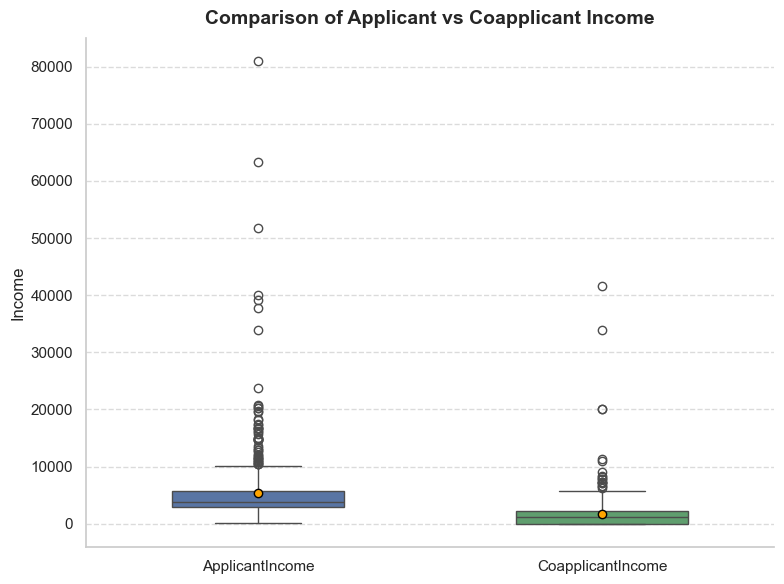

In [12]:
income_df = loan_df[["ApplicantIncome", "CoapplicantIncome"]].melt(
    var_name="Income Type", value_name="Income"
)

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(
    data=income_df,
    x="Income Type",
    y="Income",
    palette=["#4C72B0", "#55A868"],
    hue="Income Type",
    width=0.5,
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "orange", "markeredgecolor": "black"},
    ax=ax
)

# Aesthetic cleanup
ax.spines[["right", "top"]].set_visible(False)
ax.set_title("Comparison of Applicant vs Coapplicant Income", fontsize=14, fontweight="bold", pad=10)
ax.set_xlabel("")
ax.set_ylabel("Income", fontsize=12)
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# fig.savefig('../Plots/Applicant_vs_Coapplicant_Income_Boxplot.png', dpi=300, bbox_inches='tight')

#### Is useful to combine 'CoapplicantIncome' with 'ApplicantIncome' to create a **TotalIncome** feature for more stable predictive performance.

In [13]:
loan= loan_df.copy()

In [14]:
loan["TotalIncome"] = loan["ApplicantIncome"] + loan["CoapplicantIncome"]

### LoanAmount Boxplot

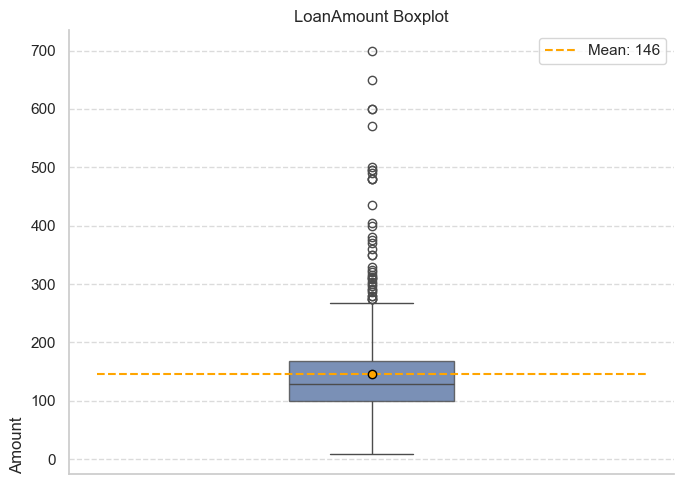

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="whitegrid")

sns.boxplot(
    y=loan_df["LoanAmount"],
    ax=ax,
    color="#4C72B0",
    width=0.3,
    boxprops=dict(alpha=0.8),
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "orange", "markeredgecolor": "black"},
)

ax.spines[["right", "top"]].set_visible(False)

mean_Amount = loan_df["LoanAmount"].mean()
ax.hlines(
    mean_Amount,
    linestyles="dashed",
    xmin=-0.5,  
    xmax=0.5,
    color="orange",
    label=f"Mean: {mean_Amount:.0f}"
)

ax.set_title("LoanAmount Boxplot")
ax.set_xlabel("") 
ax.set_ylabel("Amount", loc="bottom")
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.legend()
plt.tight_layout()
plt.show()


# fig.savefig('../Plots/LoanAmount Boxplot.png',dpi=300, bbox_inches='tight')

### Create an Income-to-Loan Ratio column
How easily someone can afford their loan.

In [16]:
loan['Income_to_Loan_Ratio'] = loan['TotalIncome'] / loan['LoanAmount']

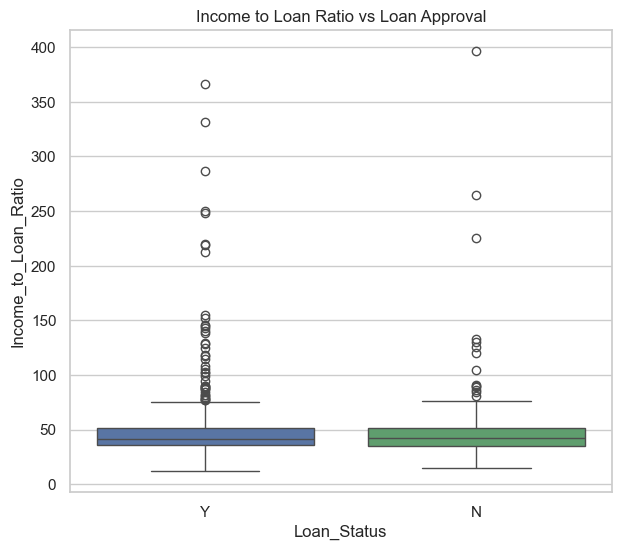

In [17]:
fig , ax = plt.subplots(figsize = (7,6))

sns.boxplot(x='Loan_Status', y='Income_to_Loan_Ratio', data=loan,  palette=["#4C72B0", "#55A868"], hue= 'Loan_Status')
plt.title("Income to Loan Ratio vs Loan Approval")
plt.ylabel('Income_to_Loan_Ratio')
plt.show()

# fig.savefig('../Plots/Income to Loan Ratio vs Loan Approval Boxplot.png',dpi=300, bbox_inches='tight')

### Interpretation:
- The median Income_to_Loan_Ratio is nearly the same for both approved (Y) and rejected (N) loans.

- Both groups have a wide range of outliers — meaning that approval decisions weren’t strongly separated by this ratio.

- While one might expect lower ratios (less income per unit of loan) to correlate with rejection, the data doesn’t clearly show this trend here.(The ratio might need log transformation or binning to reveal clearer patterns.)

## Log scale for ratio:

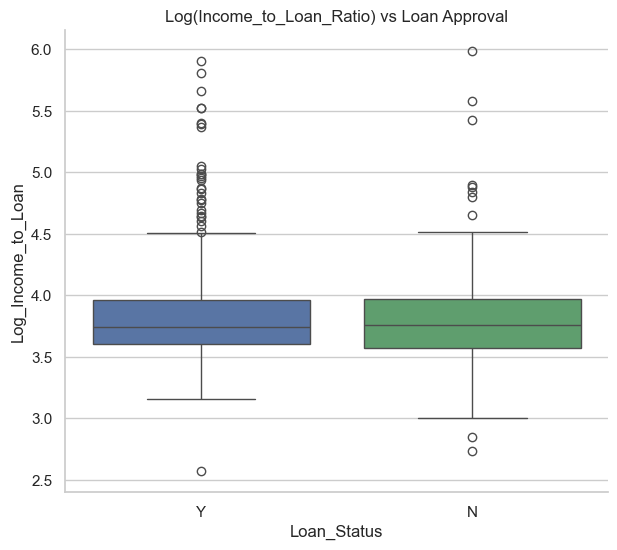

In [18]:
fig , ax = plt.subplots(figsize = (7,6))

loan['Log_Income_to_Loan'] = np.log1p(loan['Income_to_Loan_Ratio'])

ax.spines[["right", "top"]].set_visible(False)

sns.boxplot(x='Loan_Status', y='Log_Income_to_Loan', data=loan, palette=["#4C72B0", "#55A868"], hue= 'Loan_Status')
plt.title("Log(Income_to_Loan_Ratio) vs Loan Approval")
plt.show()

# fig.savefig('../Plots/Log(Income_to_Loan_Ratio) vs Loan Approval Boxplot.png',dpi=300, bbox_inches='tight')

Insight:
- There is a strong, direct relationship between a higher income-to-loan ratio and the likelihood of loan approval.

In [19]:
loan["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [20]:
loan['Ratio_Bin'] = pd.qcut(loan['Income_to_Loan_Ratio'], 5, labels=False)

approval_rate = (
    loan.groupby('Ratio_Bin')['Loan_Status']
    .apply(lambda x: (x == 'Y').mean())
    .reset_index()
    .rename(columns={'Loan_Status': 'Approval_Rate'})
)

print(approval_rate)

   Ratio_Bin  Approval_Rate
0        0.0       0.655462
1        1.0       0.711864
2        2.0       0.703390
3        3.0       0.694915
4        4.0       0.705882


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22176\4076669844.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


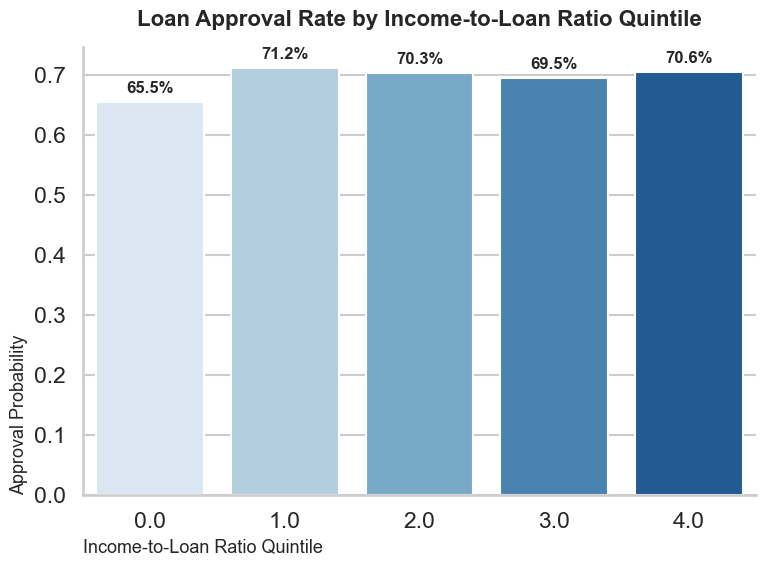

In [21]:
# Create ratio bins
loan['Ratio_Bin'] = pd.qcut(loan['Income_to_Loan_Ratio'], 5, labels=False)

# Compute approval rate for each bin
approval_rate = (
    loan.groupby('Ratio_Bin')['Loan_Status']
    .apply(lambda x: (x == 'Y').mean())
    .reset_index()
    .rename(columns={'Loan_Status': 'Approval_Rate'})
)

sns.set(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Blues", len(approval_rate))
bars = sns.barplot(
    x='Ratio_Bin',
    y='Approval_Rate',
    data=approval_rate,
    palette=colors,
    ax=ax
)

# Annotate bars with percentage labels
for p in bars.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.01,
        f"{height:.1%}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

ax.set_title("Loan Approval Rate by Income-to-Loan Ratio Quintile",
             fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Income-to-Loan Ratio Quintile", fontsize=13, loc="left")
ax.set_ylabel("Approval Probability", fontsize=13, loc="bottom")
sns.despine()
plt.tight_layout()
plt.show()

# fig.savefig('../Plots/Approval Rate by Income-to-Loan Ratio Bin barplot.png',dpi=300, bbox_inches='tight')

### Interpretion:
- The approval probability ranges between 65% and 71%, showing a generally high acceptance rate across all groups.
- The differences are small, suggesting that the **income-to-loan ratio is a weak but positive predictor** of loan approval likelihood.

### Monthly EMI (Equated Monthly Installment) column
If EMI is a large portion of income, the loan is less likely to be approved.

In [22]:
loan['EMI'] = loan['LoanAmount'] / loan['Loan_Amount_Term']

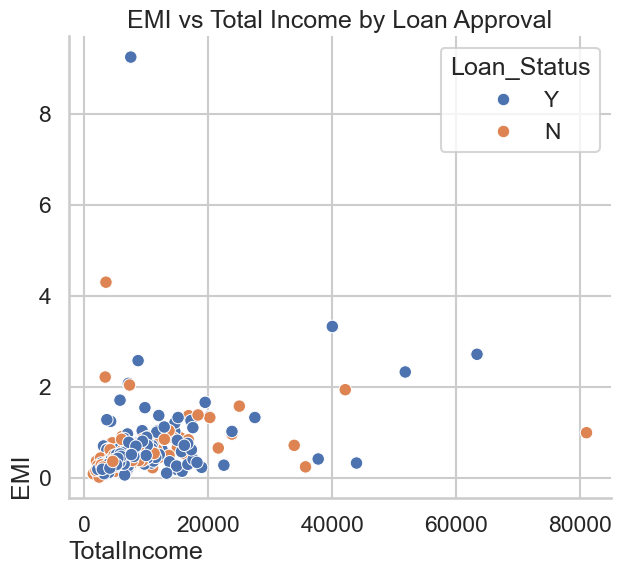

In [23]:
fig , ax = plt.subplots(figsize = (7,6))
sns.scatterplot(
    x='TotalIncome',
    y='EMI',
    hue='Loan_Status',
    data=loan
)

ax.spines[["right", "top"]].set_visible(False)

plt.title("EMI vs Total Income by Loan Approval")
plt.xlabel("TotalIncome", loc="left")
plt.ylabel("EMI", loc="bottom")
plt.show()
# fig.savefig('../Plots/EMI vs Total Income by Loan Approval scatterplot.png',dpi=300, bbox_inches='tight')

Insight:

- Most applicants cluster at low EMI and low-to-moderate income levels.

- Approved (Y) and rejected (N) loans overlap heavily, but at lower income levels, we see slightly more rejections for higher EMIs.

- This supports the idea that high EMI relative to income can reduce approval chances, though the boundary is not perfectly sharp.

### Income vs Loan_Status by Gender

In [24]:
loan['Gender'] = loan['Gender'].map({'Male': 1, 'Female': 0})
loan['Loan_Status'] = loan['Loan_Status'].map({'Y': 1, 'N': 0})

In [25]:
loan[['Gender','ApplicantIncome','Loan_Status']].corr()

,Gender,ApplicantIncome,Loan_Status
Gender,1.000000,0.053989,0.019857
ApplicantIncome,0.053989,1.000000,-0.004710
Loan_Status,0.019857,-0.004710,1.000000


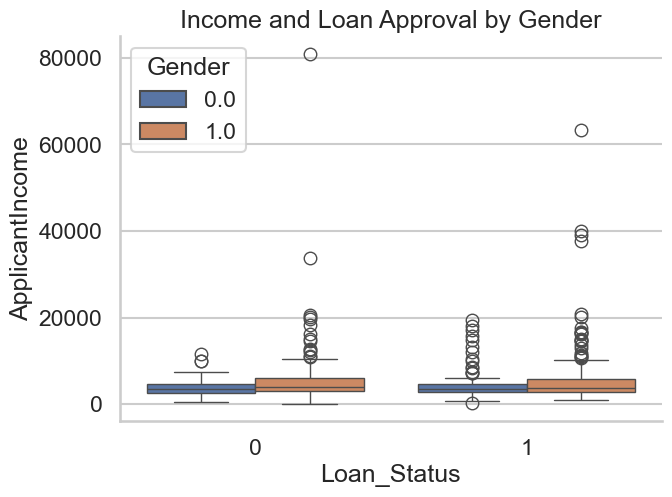

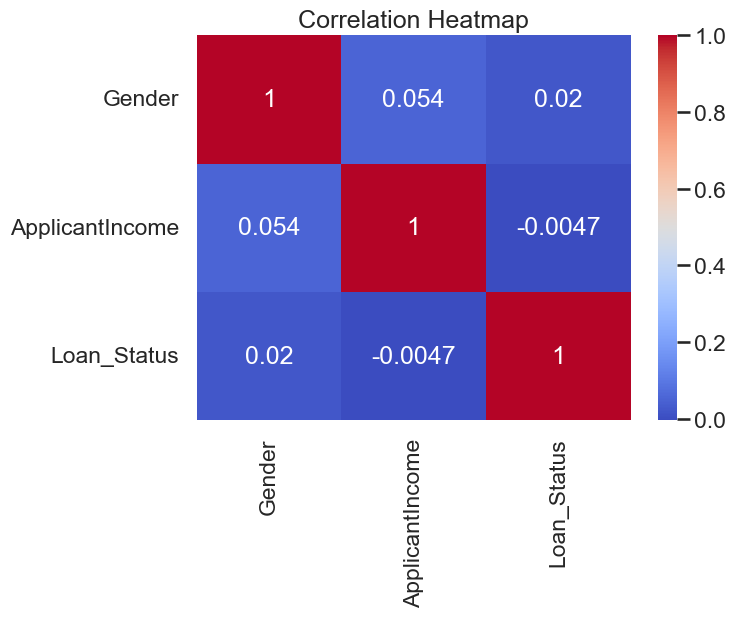

In [26]:
fig , ax = plt.subplots(figsize = (7,5))

ax.spines[["right", "top"]].set_visible(False)

sns.boxplot(data=loan, x='Loan_Status', y='ApplicantIncome', hue='Gender')
plt.title("Income and Loan Approval by Gender")
plt.show()

# fig.savefig('../Plots/Income and Loan Approval by Gender Boxplot.png',dpi=300, bbox_inches='tight') 

fig , ax = plt.subplots(figsize = (7,5))
# Heatmap for correlations
sns.heatmap(loan[['Gender','ApplicantIncome','Loan_Status']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# fig.savefig('../Plots/Income and Loan Approval by Gender Correlation Heatmap.png',dpi=300, bbox_inches='tight') 

### Interpretation:
- There is no strong linear relationship between Gender, Income, and Loan_Status.

## Correlation 

Encode

In [27]:
binary_cols = [
    "Gender",
    "Married",
    "Education",
    "Self_Employed",
    "Credit_History"
    ]

ordinal_cols = ["Dependents"]

nominal_cols = ["Property_Area"]

In [28]:
from sklearn.preprocessing import  OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing_encode = ColumnTransformer([
    ('binary', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), binary_cols),
    ('ordinal', OrdinalEncoder(categories=[['0', '1', '2', '3+']] ,handle_unknown="use_encoded_value", unknown_value=-1), ordinal_cols),
    ('nominal', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols)
],remainder='passthrough')

loan_encoded = preprocessing_encode.fit_transform(loan)


In [29]:
encoded_colnames = (
    preprocessing_encode.named_transformers_['binary'].get_feature_names_out(binary_cols).tolist() +
    preprocessing_encode.named_transformers_['ordinal'].get_feature_names_out(ordinal_cols).tolist() +
    preprocessing_encode.named_transformers_['nominal'].get_feature_names_out(nominal_cols).tolist() +
    [col for col in loan.columns if col not in binary_cols + ordinal_cols + nominal_cols]
)

loan_encoded_df = pd.DataFrame(loan_encoded, columns=encoded_colnames)
loan_encoded_df


,Gender,Married,Education,Self_Employed,Credit_History,Dependents,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,TotalIncome,Income_to_Loan_Ratio,Log_Income_to_Loan,Ratio_Bin,EMI
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5849.0,0.0,NaN,360.0,1.0,5849.0,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,0.0,6091.0,47.585938,3.883334,3.0,0.355556
2,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,3000.0,45.454545,3.838474,3.0,0.183333
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2583.0,2358.0,120.0,360.0,1.0,4941.0,41.175000,3.741828,2.0,0.333333
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6000.0,0.0,141.0,360.0,1.0,6000.0,42.553191,3.773983,2.0,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,2900.0,40.845070,3.733974,2.0,0.197222
610,1.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,4106.0,102.650000,4.641020,4.0,0.222222
611,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8072.0,240.0,253.0,360.0,1.0,8312.0,32.853755,3.522050,0.0,0.702778
612,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,7583.0,0.0,187.0,360.0,1.0,7583.0,40.550802,3.726917,2.0,0.519444


In [30]:
corr_matrix = loan_encoded_df.corr(numeric_only=True)
corr_with_target = corr_matrix['Loan_Status'].sort_values(ascending=False)
matrix = np.triu(loan_encoded_df.corr(numeric_only=True))
print(corr_with_target)

Loan_Status                1.000000
Credit_History             0.561678
Property_Area_Semiurban    0.136540
Married                    0.089280
Log_Income_to_Loan         0.048455
Ratio_Bin                  0.025882
Income_to_Loan_Ratio       0.024234
Gender                     0.019857
Dependents                 0.014263
Self_Employed             -0.002303
ApplicantIncome           -0.004710
EMI                       -0.015394
Loan_Amount_Term          -0.021268
TotalIncome               -0.031271
LoanAmount                -0.037318
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education                 -0.085884
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64


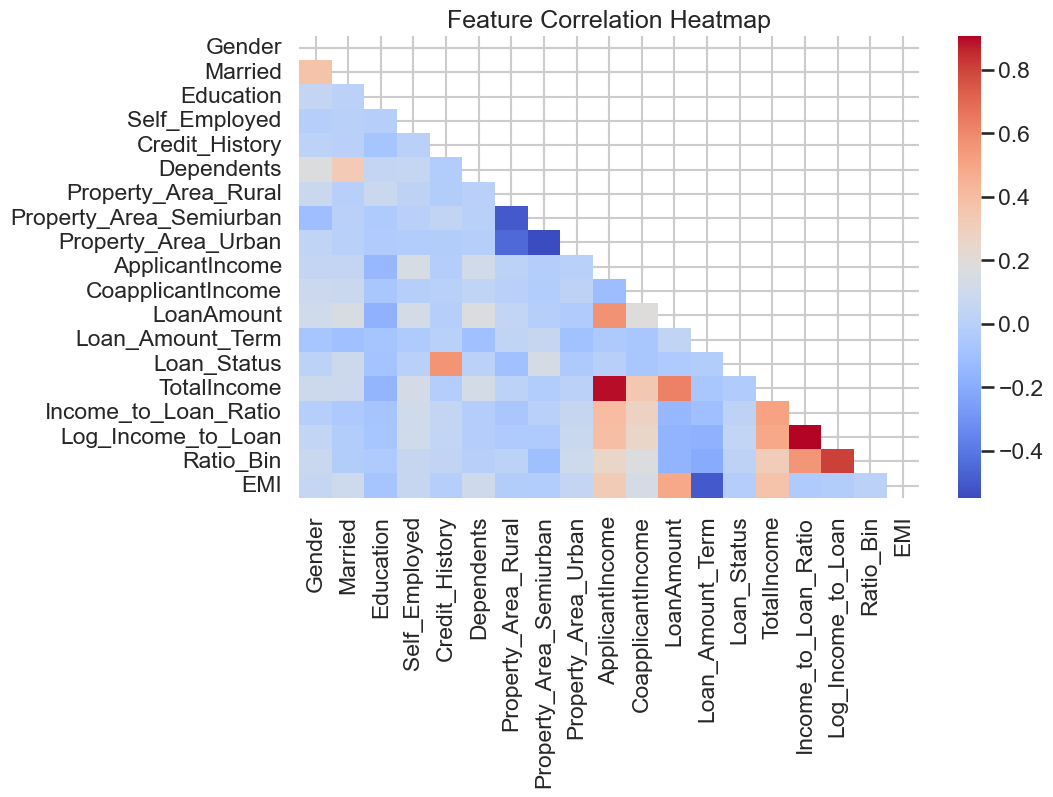

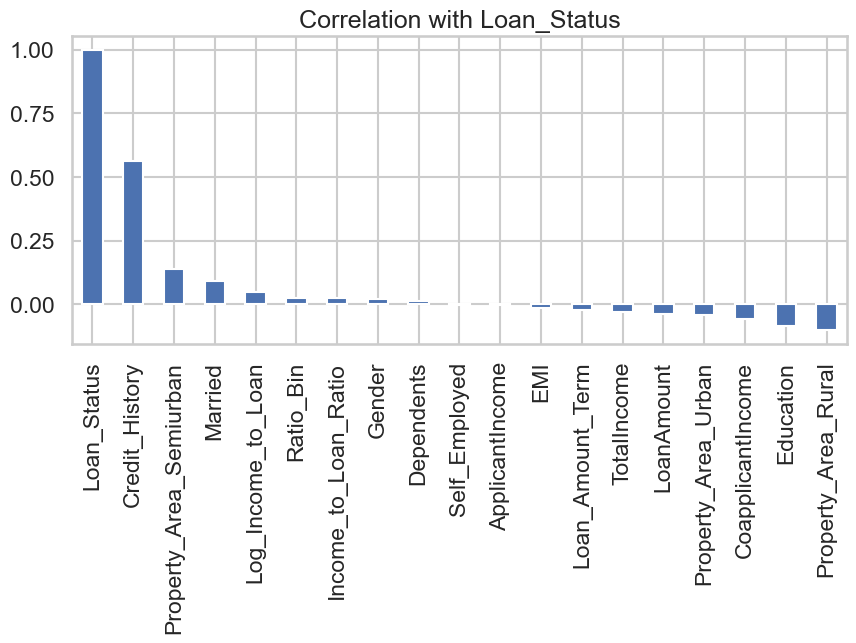

In [31]:
fig , ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', mask=matrix)
plt.title("Feature Correlation Heatmap")
plt.show()

# fig.savefig('../Plots/Feature Correlation Heatmap.png',dpi=300, bbox_inches='tight') 

# Focus on correlation with target
fig , ax = plt.subplots(figsize=(10,6))
corr_with_target.plot(kind='bar', title='Correlation with Loan_Status', figsize=(10,4))
plt.show()

# fig.savefig('../Plots/Correlation with Loan_Status.png',dpi=300, bbox_inches='tight') 


## Insights by feature

- **Credit_History** → 0.56: strongest predictor of loan approval,

- **Property_Area_Semiurban** → 0.14: Applicants from semi-urban areas are slightly more likely to get approved

- **Married** → 0.09: Married applicants have a slightly higher chance of approval

- **Log_Income_to_Loan** (≈ 0.05) & **Ratio_Bin** (≈ 0.026) and **Income_to_Loan_Ratio** (≈ 0.024): weak positive linear correlation

- **Gender**, **Dependents**, **Self_Employed** → near 0

- **ApplicantIncome**, **EMI**, **LoanAmount**, **TotalIncome**: small negative correlations

- **Education** → -0.086: Slight negative correlation — maybe some applicant types with “Graduate” status request higher-risk loans or have other correlated factors.

- **Property_Area_Rural** → -0.10: Applicants from rural areas are somewhat less likely to be approved.

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                601 non-null    float64
 1   Married               611 non-null    object 
 2   Dependents            599 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         582 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            592 non-null    float64
 8   Loan_Amount_Term      600 non-null    float64
 9   Credit_History        564 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    int64  
 12  TotalIncome           614 non-null    float64
 13  Income_to_Loan_Ratio  592 non-null    float64
 14  Log_Income_to_Loan    592 non-null    float64
 15  Ratio_Bin             5

In [33]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Add columns

In [34]:
loan_df["TotalIncome"] = loan_df["ApplicantIncome"] + loan_df["CoapplicantIncome"]
loan_df['Income_to_Loan_Ratio'] = loan_df['TotalIncome'] / loan_df['LoanAmount']
loan_df['Log_Income_to_Loan'] = np.log1p(loan_df['Income_to_Loan_Ratio'])

In [35]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                601 non-null    object 
 1   Married               611 non-null    object 
 2   Dependents            599 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         582 non-null    object 
 5   ApplicantIncome       614 non-null    int64  
 6   CoapplicantIncome     614 non-null    float64
 7   LoanAmount            592 non-null    float64
 8   Loan_Amount_Term      600 non-null    float64
 9   Credit_History        564 non-null    float64
 10  Property_Area         614 non-null    object 
 11  Loan_Status           614 non-null    object 
 12  TotalIncome           614 non-null    float64
 13  Income_to_Loan_Ratio  592 non-null    float64
 14  Log_Income_to_Loan    592 non-null    float64
dtypes: float64(7), int64(1)

In [36]:
# selected features

numerical_cols = [
    "TotalIncome",
    "LoanAmount",
    "Log_Income_to_Loan"
    ]
binary_cols = [
    "Education",
    "Self_Employed",
    "Credit_History"
    ]
nominal_cols = ["Property_Area"]

# Modeling

## Imputation of Missing Data
✅ Choose Simple Imputer:

- Working with large datasets

- Need fast processing

- Prototyping or building MVP

- Computational resources are limited


## Encodeing categorical features
- Use OrdinalEncoder for binary features.
- Use OneHotEncoder for Multi-class nominal feature.
- Use LabelEncoder only for the target.
- LabelEncoder in scikit-learn is meant for target variables (y), not features (X).

## Data normalization
- scales numerical features into a specific range
- Speeding up model convergence.
- Making weights easier to optimize.
- Preventing large-scale features from dominating smaller ones.
- Improving model accuracy and stability.

| Type | Formula | Output Range | Typical Use Case |
|------|----------|---------------|------------------|
| **Min-Max Scaling** | \( X' = \frac{X - X_{min}}{X_{max} - X_{min}} \) | [0, 1] or [-1, 1] | Neural networks, distance-based models (KNN, SVM) |
| **Z-Score Standardization** | \( X' = \frac{X - \mu}{\sigma} \) | Mean = 0, Std = 1 | Regression models, gradient-based algorithms |
| **Robust Scaling** | \( X' = \frac{X - Median}{IQR} \) | Depends on data | Data with many outliers |
| **Unit Vector Normalization** | \( X' = \frac{X}{\|X\|} \) | Vector length = 1 | Models using cosine similarity (e.g., NLP) |


| **Model Type**                                                            | **Feature Form**                      | **Why**                                                                                                                                                     |
| ------------------------------------------------------------------------- | ------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **LogisticRegression**  | ✅ **`Log_Income_to_Loan`** + **`StandardScaler`** | The log transform makes the relationship more linear and stabilizes variance.StandardScaler ensures zero mean and unit variance for stable optimization.                                       |
| **Neural networks or KNN**                                                | ✅ **`Log_Income_to_Loan`** + **`MinMaxScaler`**   | These algorithms are sensitive to feature scale and benefit from normalized ranges.                                                                         |


## pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , FunctionTransformer

numerical_pipeline = Pipeline(
    steps = [("Imputer",SimpleImputer(strategy= "median"))]
)
binary_pipeline = Pipeline(
    steps = [
        ("Imputer",SimpleImputer(strategy= "most_frequent")),
        ("Encoder",OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
        ]
)
nominal_pipeline = Pipeline(
    steps=[("Encoder",OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

col_trans = ColumnTransformer(
    transformers=[
        ("numerical", numerical_pipeline, numerical_cols),
        ("binary", binary_pipeline, binary_cols),
        ("nominal", nominal_pipeline, nominal_cols)
    ]
)


## Train Validation Test split

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = loan_df[numerical_cols + binary_cols + ordinal_cols + nominal_cols]
y = loan_df["Loan_Status"]

# Encode label
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y # 'stratify' is good for classification ,
                                                       # to ensure all sets have the same proportion of classes as the original dataset. 
                                                        # This is crucial for imbalanced datasets.
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=(20/85), random_state=42, stratify=y_temp
)

# LogisticRegression
- The LogisticRegression predict the probability of Loan Approveal. 

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(random_state=0)


### Without scaling

In [40]:
log_reg_clf_pipeline = Pipeline(
    steps=[
        ("col_trans" ,col_trans),
        ("model", log_reg_clf)
    ]
)

In [41]:
from sklearn import set_config

set_config(display="diagram")
display(log_reg_clf_pipeline)

,steps,"[('col_trans', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
log_reg_clf_pipeline.fit(X_train, y_train)

score_log_reg_clf = log_reg_clf_pipeline.score(X_val, y_val)
print(f"Model score(without scaling): {score_log_reg_clf* 100:.2f}")  # model accuracy

Model score(without scaling): 78.05


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Logistic Regression, K-Nearest Neighbors,and Gradient Descent–based models, rely on distance calculations or gradient optimization.
- Without Scaling the model’s optimization algorithm take longer to converge or even fail to converge (as seen with the ConvergenceWarning in Logistic Regression).

### Effect of Scaling on Logistic Regression:

Logistic Regression uses gradient descent optimization (e.g., lbfgs solver).
When features have very different ranges:
- Gradients become unbalanced.
- The model struggles to find the optimal coefficients.
- The training process may show warnings like: ConvergenceWarning: lbfgs failed to converge after 100 iterations

### With scaling

In [43]:
from sklearn.preprocessing import StandardScaler

log_reg_clf_sacle_pipeline = Pipeline(
    steps=[
        ("col_trans" ,col_trans),
        ("scale",StandardScaler()),
        ("model", log_reg_clf)
    ]
)

In [44]:
set_config(display="diagram")
display(log_reg_clf_sacle_pipeline)

,steps,"[('col_trans', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
log_reg_clf_sacle_pipeline.fit(X_train, y_train)

score_log_reg_clf_sacle = log_reg_clf_sacle_pipeline.score(X_val, y_val)
print(f"Model score(with scaling): {score_log_reg_clf_sacle* 100:.2f}")  # model accuracy

Model score(with scaling): 77.24


- The model accuracy slightly decreased after scaling (from 78.05 → 77.24).
- At first glance, this might seem like scaling made the model worse — but this is not necessarily true.

In [46]:
# Define parameter grid
param_grid_logistic_regression = {
    "model__penalty": ["l1", "l2"],
    "model__C": np.logspace(-4, 4, 20),
    "model__solver": ["liblinear"],
}

In [47]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV
grid_search_logistic_regression_scale = GridSearchCV(
    log_reg_clf_sacle_pipeline,
    param_grid=param_grid_logistic_regression,
    cv=5,
    scoring="accuracy",
    verbose=True,
    n_jobs=-1,
)

In [48]:
grid_search_logistic_regression_scale.fit(X_train, y_train)

print(f"Best Score of train set: {grid_search_logistic_regression_scale.best_score_* 100:.2f}")
print(f"Best parameter set: {grid_search_logistic_regression_scale.best_params_}")
print(f"Test Score: {grid_search_logistic_regression_scale.score(X_val, y_val)* 100:.2f}%")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Score of train set: 80.90
Best parameter set: {'model__C': 0.03359818286283781, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Test Score: 78.05%


- Even though the model’s accuracy decreased slightly after scaling, the process eliminated convergence warnings and made the Logistic Regression model more stable and trustworthy.

In [49]:
# Evaluate on test set
best_logistic_regression_scale = grid_search_logistic_regression_scale.best_estimator_
test_score = best_logistic_regression_scale.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score * 100:.2f}%")

Test Set Accuracy: 84.95%


In [50]:
y_pred_logistic = grid_search_logistic_regression_scale.best_estimator_.predict(X_test)

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_log = precision_score(y_test, y_pred_logistic)
recall_log = recall_score(y_test, y_pred_logistic)
f1_log = f1_score(y_test, y_pred_logistic)

print(f"Precision score: {precision_log* 100:.2f}%")
print(f"Recall score: {recall_log* 100:.2f}%")
print(f"F-1 score: {f1_log* 100:.2f}%")

Precision score: 82.89%
Recall score: 98.44%
F-1 score: 90.00%


## Interpretation

1.Precision (82.89%)

- Precision measures how many of the loan applications the model predicted as approved were actually truly approved.

- A precision of 82.89% means that about 83% of the applicants the model classified as “approved” were genuinely eligible.

- This indicates a moderate false positive rate — a small number of applicants were incorrectly predicted as approved when they should not have been.(It might be because of the credit history imputation method. We should select a more sensitive one.)

2.Recall (98.44%)

- Recall measures how many of the truly approved applicants were correctly identified by the model.

- A recall of 0.984 is very high, meaning the model successfully identified 98.4% of all genuinely approvable loans.

- This suggests the model is highly sensitive and rarely misses qualified applicants (low false negatives).

3.F1-Score (90%)

- The F1 score is the harmonic mean of precision and recall, providing a balance between the two.

- A value of 0.900 reflects a strong overall classification performance, especially when both identifying true approvals and minimizing incorrect approvals are important.

## Business Implications

- The model is very good at detecting eligible loan applicants (high recall), which is beneficial if the cost of missing a qualified applicant is high (e.g., lost business opportunities).

- The slightly lower precision means there is a moderate risk of approving ineligible applicants, which could increase financial risk if not mitigated by additional screening or human review.

## confusion_matrix

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

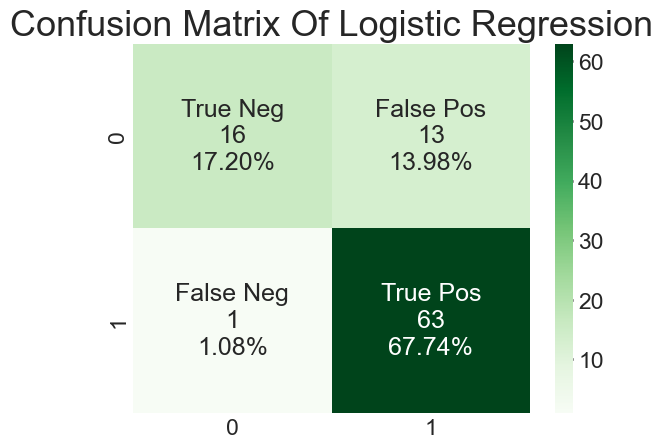

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_logistic.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_logistic.flatten() / np.sum(confusion_matrix_logistic)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_matrix_logistic, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of Logistic Regression")
# plt.savefig("../Plots/Confusion Matrix Of Logistic Regression.png", dpi=300, bbox_inches='tight')
plt.show()

- Only 1.08% of creditworthy applicants are rejected (minimal lost business opportunity)

- 13.98% of risky applicants get approved (potential bad loans)

# KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler


## Choose the Best k

### Without scaling

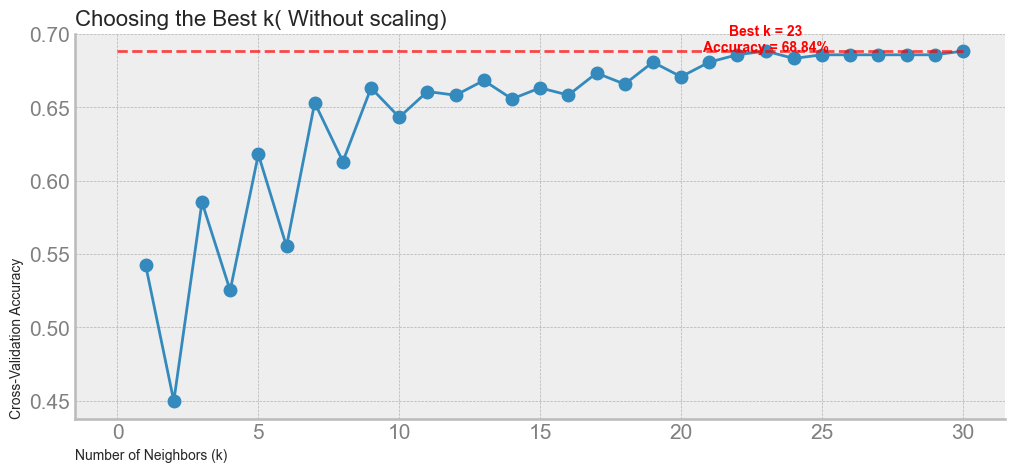

In [59]:
# Try different k values
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_pipeline = Pipeline(
        steps=[
            ("col_trans" ,col_trans),
            ("model", knn)
        ]
    )
    scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find best k
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)
# Plot performance
fig, ax = plt.subplots(figsize = (12,5))

plt.plot(k_values, cv_scores, marker='o')

plt.text(best_k, best_score,
         f"Best k = {best_k}\nAccuracy = {best_score*100:.2f}%",
         color='red', fontsize=10, fontweight='bold', ha='center')

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")

plt.hlines(y=best_score, color='red', linestyle='--', alpha=0.7, xmin=0, xmax=30)

plt.xlabel('Number of Neighbors (k)',loc="left", fontsize=10)
plt.ylabel('Cross-Validation Accuracy', loc="bottom", fontsize=10)
plt.title('Choosing the Best k( Without scaling)', fontsize=16, loc="left")
plt.show()

# fig.savefig('../Plots/Choosing the Best k( Without scaling).png',dpi=300, bbox_inches='tight') 

**Best k: 23**

**Best cross-validation accuracy: 68.84%**

- The accuracy curve shows a slow and unstable increase as k grows, indicating that the model struggles to find a stable relationship between feature distances and class labels.
- The fluctuations and low accuracy suggest that some features with larger numeric ranges dominate the distance computation, leading to biased neighbor selection.
- As a result, the model performs inconsistently and requires a larger k (smoothing effect) to partially mitigate the bias introduced by unscaled data.

### Effect of scaling on KNeighborsClassifier:
KNN relies on distance metrics

- KNN determines a sample’s class by measuring distances (commonly Euclidean) to its neighbors.
- When features have different scales (e.g., income in thousands vs. age in years), the feature with the larger numeric range dominates the distance calculation.
- This makes the algorithm biased toward features with higher magnitude, ignoring the effect of smaller-scaled features.

In [60]:
set_config(display="diagram")
display(knn_pipeline)

,steps,"[('col_trans', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### with scaling

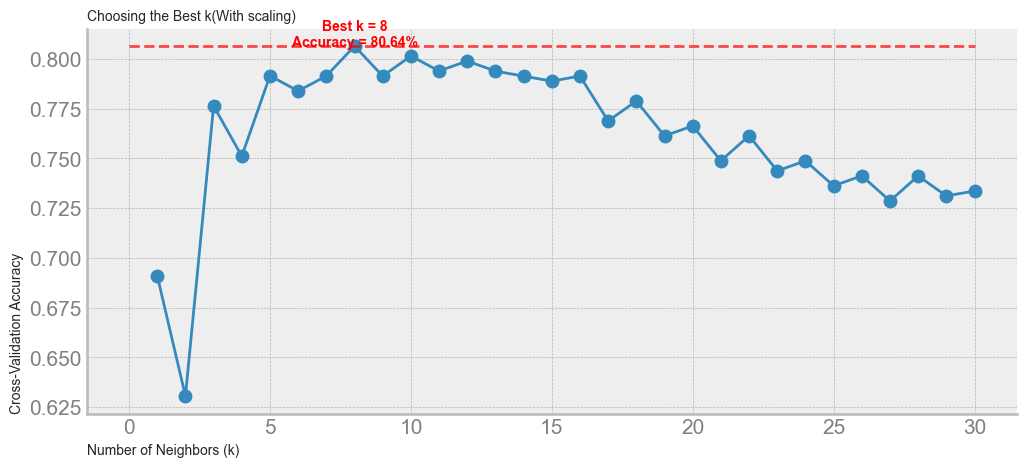

In [61]:
# Try different k values
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scale_pipeline = Pipeline(
        steps=[
            ("col_trans" ,col_trans),
            ("scale", MinMaxScaler()),
            ("model", knn)
        ]
    )
    scores = cross_val_score(knn_scale_pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find best k
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

# Plot performance
fig, ax = plt.subplots(figsize = (12,5))

plt.plot(k_values, cv_scores, marker='o')

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small")

plt.text(best_k, best_score,
         f"Best k = {best_k}\nAccuracy = {best_score * 100:.2f}%",
         color='red', fontsize=10, fontweight='bold', ha='center')

plt.hlines(y=best_score, color='red', linestyle='--', alpha=0.7, xmin=0, xmax=30)

plt.xlabel('Number of Neighbors (k)',loc="left", fontsize=10)
plt.ylabel('Cross-Validation Accuracy', loc="bottom", fontsize=10)
plt.title('Choosing the Best k(With scaling)',loc="left",fontsize=10)
plt.show()

# fig.savefig('../Plots/Choosing the Best k( With scaling).png',dpi=300, bbox_inches='tight') 

**Best k = 8**

**Best cross-validation accuracy: 80.64%**

- After applying feature scaling, the model’s performance improves significantly by ~12%.
- The accuracy curve becomes more stable, and the optimal k is much smaller, indicating that distances are now more meaningful and balanced across features.
- This leads to better discrimination between classes and improved generalization.

**As seen in the plots, scaling helps the model:**

- Converge to a meaningful optimal k (from 23 → 8)

- Improve accuracy (from 68.84% → 80.64%)

- Reduce noise and improve stability of cross-validation scores.

In [62]:
set_config(display="diagram")
display(knn_scale_pipeline)

,steps,"[('col_trans', ...), ('scale', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## KNN Hyperparameter Tuning using GridSearchCV

In [63]:
# Define parameter grid
param_grid = {
    "model__n_neighbors": np.arange(1, 31),
    "model__weights": ["uniform", "distance"], 
    "model__p": [1, 2] 
}

In [64]:
# Initialize GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn_scale_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [65]:
# Fit GridSearchCV
grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_knn.best_score_ * 100:.2f}%")
print(f"Test Score: {grid_search_knn.score(X_val, y_val)* 100:.2f}%")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'model__n_neighbors': 8, 'model__p': 2, 'model__weights': 'uniform'}
Best Cross-Validation Accuracy: 80.64%
Test Score: 77.24%


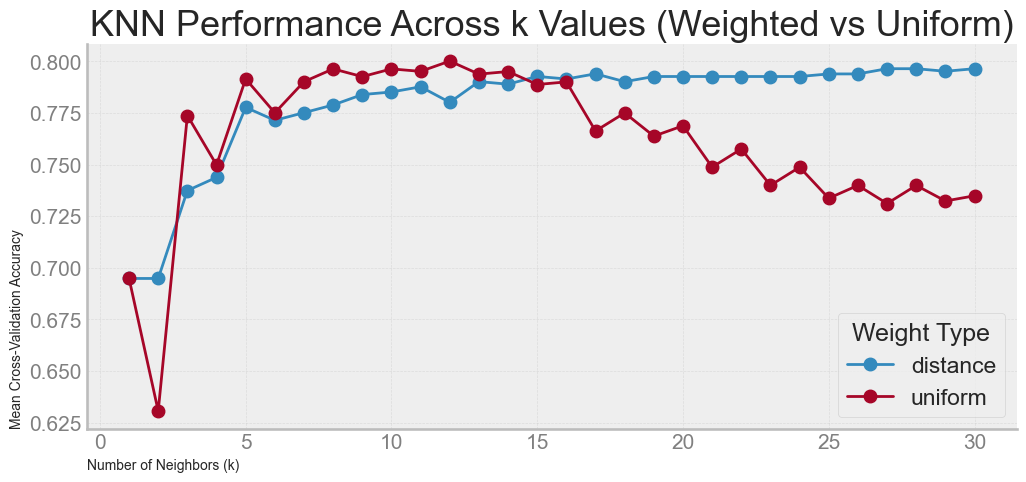

In [93]:
# Plot mean CV results for different k
results = pd.DataFrame(grid_search_knn.cv_results_)
pivot_table = results.pivot_table(
    index='param_model__n_neighbors',
    columns='param_model__weights',
    values='mean_test_score'
)

fig, ax= plt.subplots(figsize=(12, 5))
pivot_table.plot(marker='o', ax=plt.gca())

ax.spines[["right", "top"]].set_visible(False)
ax.tick_params(axis="both", colors="gray", labelsize="small") 

plt.title('KNN Performance Across k Values (Weighted vs Uniform)')
plt.xlabel('Number of Neighbors (k)',loc="left",fontsize=10)
plt.ylabel('Mean Cross-Validation Accuracy', loc="bottom",fontsize=10)
plt.legend(title='Weight Type')
plt.grid(True, alpha=0.3)
plt.show()
fig.savefig('../Plots/KNN Performance Across k Values (Weighted vs Uniform).png',dpi=300, bbox_inches='tight') 


- Both weighting methods show a sharp improvement in accuracy as 𝑘 increases from 1 to around 5, where the model stabilizes.

- After that, the accuracy plateaus and slightly declines at higher 𝑘 values, which is typical since too many neighbors cause over-smoothing (less sensitivity to local patterns).

In [67]:
# Evaluate on test set
best_knn = grid_search_knn.best_estimator_
test_score = best_knn.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score * 100:.2f}%")

Test Set Accuracy: 83.87%


In [68]:
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"Precision score: {precision_knn* 100:.2f}%")
print(f"Recall score: {recall_knn* 100:.2f}%")
print(f"F-1 score: {f1_knn* 100:.2f}%")

Precision score: 84.51%
Recall score: 93.75%
F-1 score: 88.89%


## Interpretation

1.Precision(84.51%):
- Of all loan applications the model predicted as approved, 84.51% were actually approved. 
- This indicates a relatively low false-positive rate, meaning the model is careful in approving loans and doesn’t approve many unqualified applicants.

2.Recall(93.75%):
- Of all actual approved loans, 93.75% were correctly identified by the model. 
- This high recall shows that the model successfully captures most of the truly approvable cases and rarely misses eligible applicants.

3.F1-Score(88.89%):	
- The F1-score (harmonic mean of precision and recall) indicates a balanced and strong overall performance. 
- It confirms that the model maintains a good trade-off between being accurate in its approvals and not overlooking valid applicants.

## confusion_matrix

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

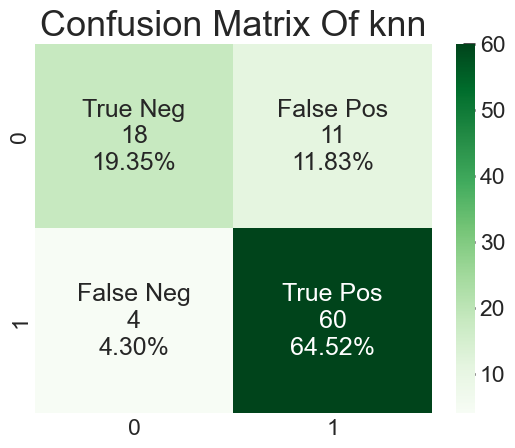

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_knn.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_knn.flatten() / np.sum(confusion_matrix_knn)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_matrix_knn, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of knn")
# plt.savefig("../Plots/Confusion Matrix Of knn.png", dpi=300, bbox_inches='tight')
plt.show()

- 4.30% of creditworthy applicants are rejected (higher lost revenue)
- Only 11.83% of risky applicants get approved (better risk control)

# ANN - MLPClassifier - a multi-layer perceptron (MLP)

In [71]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, random_state=42)

In [72]:
mlp_pipeline = Pipeline(
    steps=[
        ("col_trans", col_trans),
        ("model", mlp)
    ]
)

In [73]:
mlp_pipeline.fit(X_train, y_train)

score_mlp = mlp_pipeline.score(X_val, y_val)
print(f"Model score(without scaling):{score_mlp* 100:.2f}%")  # model accuracy

Model score(without scaling):69.92%


- The unscaled model (69.92%) struggled because MLPs are sensitive to the magnitude of feature values. 
- When features are on different scales, the optimization algorithm (gradient descent) can become inefficient.

In [74]:
from sklearn import set_config

set_config(display="diagram")
display(mlp_pipeline)

,steps,"[('col_trans', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### with scaling

In [75]:
mlp_scale_pipeline = Pipeline(
    steps=[
        ("col_trans", col_trans),
        ("scaler", MinMaxScaler()),
        ("model", mlp)
    ]
)


In [76]:
mlp_scale_pipeline.fit(X_train, y_train)

score_mlp_scale = mlp_scale_pipeline.score(X_val, y_val)
print(f"Model score(with scaling): {score_mlp_scale* 100:.2f}%")  # model accuracy

Model score(with scaling): 77.24%


- After scaling (77.24%), all features were brought to a comparable range. 
- This made the optimization process more stable and faster, allowing the network to learn better feature weights and achieve higher accuracy.

In [77]:
from sklearn import set_config

set_config(display="diagram")
display(mlp_scale_pipeline)

,steps,"[('col_trans', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('binary', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [78]:
# Define hyperparameter grid
param_grid = {
    "model__hidden_layer_sizes": [(50,), (100,), (50,50), (100,50), (100,100)],
    "model__activation": ["relu", "tanh", "logistic"],
    "model__solver": ["adam", "lbfgs"],
    "model__alpha": [0.0001, 0.001, 0.01],  # L2 regularization
    "model__learning_rate": ["constant", "adaptive"]
}

# Initialize GridSearchCV
grid_search_mlp = GridSearchCV(
    estimator=mlp_scale_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_mlp.fit(X_train, y_train)

# Display results
print("Best Parameters:", grid_search_mlp.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_mlp.best_score_ * 100:.2f}%")
print(f"Test Score: {grid_search_mlp.score(X_val, y_val)* 100:.2f}%")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'model__activation': 'relu', 'model__alpha': 0.01, 'model__hidden_layer_sizes': (50,), 'model__learning_rate': 'constant', 'model__solver': 'adam'}
Best Cross-Validation Accuracy: 80.90%
Test Score: 77.24%


In [79]:
# Create DataFrame from CV results
results_mlp = pd.DataFrame(grid_search_mlp.cv_results_)

# Sort by mean test score and get top 10
top_results = results_mlp.sort_values(by="mean_test_score", ascending=False).head(10).reset_index(drop=True)

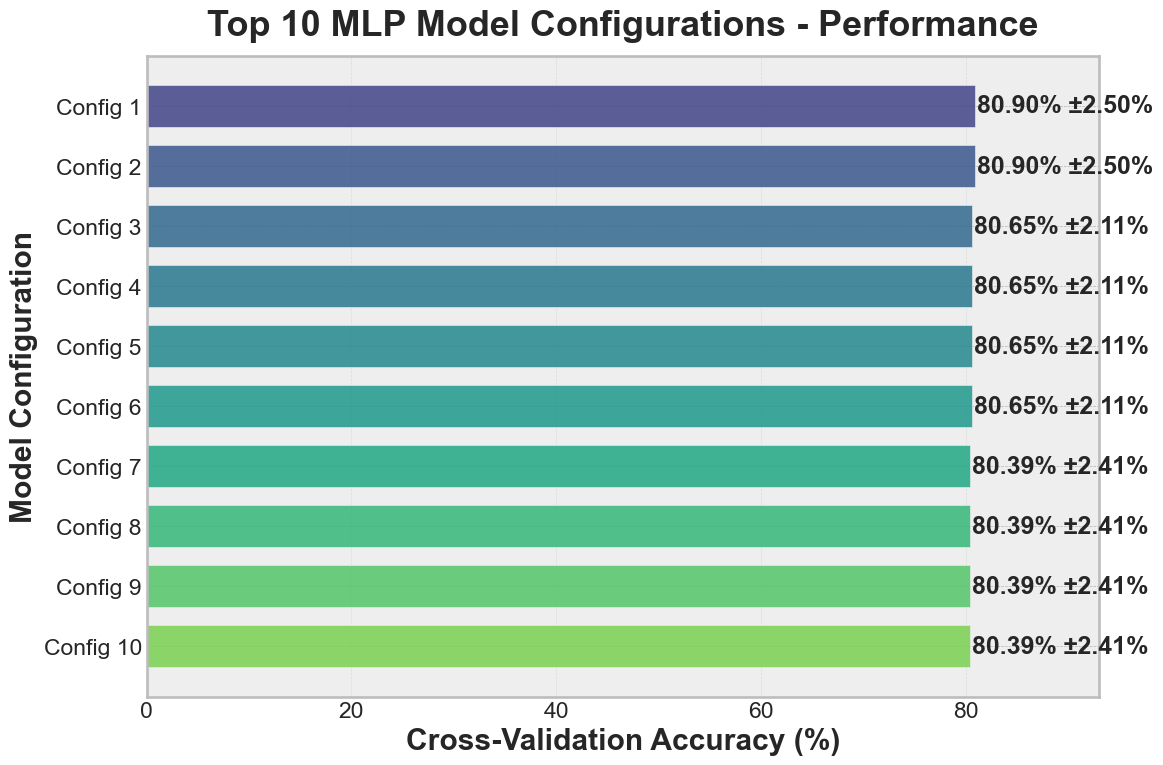

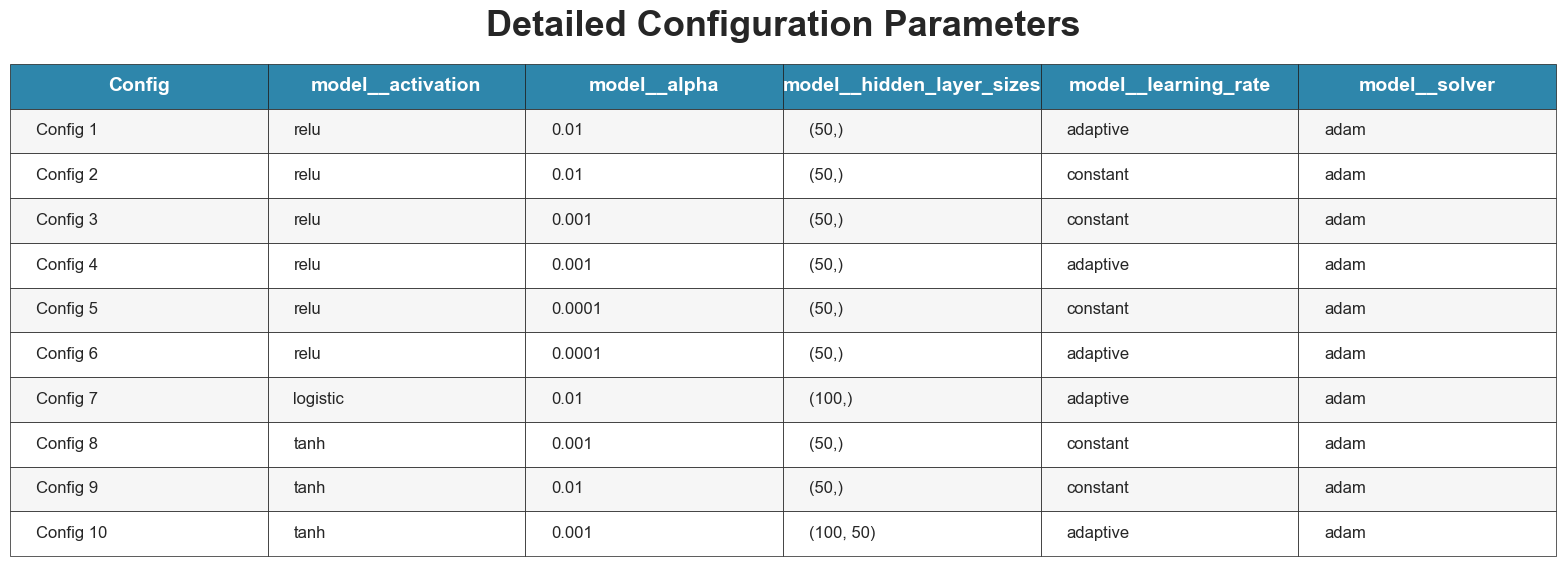

In [ ]:
# Create main performance plot
fig1, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.barh(
    range(len(top_results)),
    top_results["mean_test_score"] * 100,
    color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top_results))),
    alpha=0.85,
    height=0.7
)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}% ±{top_results["std_test_score"].iloc[i]*100:.2f}%', 
             ha='left', va='center', fontweight='bold')

ax1.set_yticks(range(len(top_results)))
ax1.set_yticklabels([f"Config {i+1}" for i in range(len(top_results))])
ax1.set_xlabel("Cross-Validation Accuracy (%)", fontweight='bold')
ax1.set_ylabel("Model Configuration", fontweight='bold')
ax1.set_xlim([0, top_results["mean_test_score"].max() * 100 * 1.15])
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()
ax1.set_title('Top 10 MLP Model Configurations - Performance', fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

# fig1.savefig('../Plots/Top 10 MLP Model Configurations - Performance.png',dpi=300, bbox_inches='tight')

# Create separate detailed table plot
fig2, ax2 = plt.subplots(figsize=(16, 6))
ax2.axis('off')

# Prepare table data with wrapped text
table_data = []
for i, params in enumerate(top_results['params']):
    row_data = [f"Config {i+1}"]
    for key, value in params.items():
        if key == 'model__hidden_layer_sizes':
            # Better formatting for hidden layers
            if hasattr(value, '__len__') and not isinstance(value, str):
                formatted = f"{value}" if len(str(value)) < 30 else f"{value}"[:27] + "..."
            else:
                formatted = str(value)
        else:
            formatted = str(value)
        row_data.append(formatted)
    table_data.append(row_data)

# Get all parameter names
param_names = ['Config'] + list(top_results['params'].iloc[0].keys())

# Create table
table = ax2.table(
    cellText=table_data,
    colLabels=param_names,
    cellLoc='left',
    loc='center',
    bbox=[0, 0, 1, 1]
)

# Style table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Header style
for col in range(len(param_names)):
    table[(0, col)].set_facecolor('#2E86AB')
    table[(0, col)].set_text_props(weight='bold', color='white', size=14)

# Alternate row colors
for i in range(len(top_results)):
    for j in range(len(param_names)):
        if i % 2 == 0:
            table[(i+1, j)].set_facecolor('#f6f6f6')

ax2.set_title('Detailed Configuration Parameters', fontweight='bold', pad=20, fontsize=26)
plt.tight_layout()
plt.show()

# fig2.savefig('../Plots/Detailed Configuration Parameters.png',dpi=300, bbox_inches='tight')


In [81]:
# Evaluate on test set
best_mlp = grid_search_mlp.best_estimator_
test_score = best_mlp.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score * 100:.2f}%")

Test Set Accuracy: 84.95%


In [82]:
y_pred_mlp = grid_search_mlp.best_estimator_.predict(X_test)

precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print(f"Precision score: {precision_mlp* 100:.2f}%")
print(f"Recall score: {recall_mlp* 100:.2f}%")
print(f"F-1 score: {f1_mlp* 100:.2f}%")

Precision score: 82.89%
Recall score: 98.44%
F-1 score: 90.00%


## Interpretation

1.Precision(82.89%):
- Out of all the loan applications the model predicted as approved, about 82.89% were actually truly approved. 
- This suggests a moderate level of reliability in the model’s positive predictions — there are some false positives (i.e., loans predicted as approved but actually not).

2.Recall(98.44%):
- The model correctly identified 98.44% of all actual approved loan applications.
- This very high recall indicates the model is excellent at capturing most of the true approvals, with very few false negatives (i.e., approved loans that the model mistakenly marked as not approved).

3.F1 Score(90.00%):
- The F1 score represents a balanced measure of precision and recall.
- A score of 90% shows that the model maintains a strong overall balance between identifying true approvals and minimizing false approvals.

## Business Implications:

- The lower precision implies potential credit risk exposure, as some applicants predicted as approved may later default.
- The high recall means the model minimizes the risk of missing qualified borrowers.
- The high F1 score suggests stable, reliable performance overall.

## confusion_matrix

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

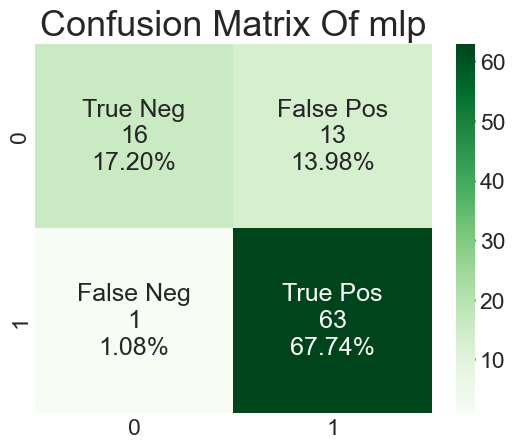

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = [
    "{0:0.0f}".format(value) for value in confusion_matrix_mlp.flatten()
]
group_percentages = [
    "{0:.2%}".format(value)
    for value in confusion_matrix_mlp.flatten() / np.sum(confusion_matrix_mlp)
]
labels = [
    f"{v1}\n{v2}\n{v3}"
    for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(confusion_matrix_mlp, annot=labels, fmt="", cmap="Greens")
plt.title("Confusion Matrix Of mlp")
# plt.savefig("../Plots/Confusion Matrix Of mlp.png", dpi=300, bbox_inches='tight')
plt.show()

- Only 1.08% of creditworthy applicants are rejected (minimal lost business opportunity)

- 13.98% of risky applicants get approved (potential bad loans)

# The result
## Logistic Regression & MLP (Identical Performance)
Strengths:

- Excellent sensitivity: Very low false negative rate (1.08%) indicates the models are highly effective at identifying positive cases

- Strong overall performance: High true positive rate (67.74%) demonstrates reliable positive class identification

- Balanced performance: Good trade-off between precision and recall

weakness:

- False positive rate of 13.98% suggests some difficulty in correctly identifying negative cases

- The models could be better at distinguishing between classes, particularly reducing false positives

## K-Nearest Neighbors (KNN)
Strengths:

- Better precision: Higher than Logistic Regression/MLP (84.5% vs 82.9%)

- Improved specificity: Lower false positive rate (11.83% vs 13.98%)

- Good negative class identification: Higher true negative rate (19.35% vs 17.20%)

weakness:

- Higher false negatives: 4.30% vs 1.08% in other models

- Slightly lower recall: More missed positive cases

## Performance Ranking:

1.Logistic Regression & MLP(due to superior recall)

2.KNN (slightly behind)

## Root Cause Analysis: Credit History Imputation (strongest predictor of loan approval)

Suboptimal Imputation Methodology

- Current method may be introducing systematic bias in risk assessment

- Over-simplified imputation (mode replacement) fails to capture the nuanced relationship between missing credit history and actual creditworthiness

Missing Pattern Significance

- Missing credit history data might not be "Missing Completely at Random" (MCAR)

- Applicants with no credit history could represent distinct risk categories (young professionals, new immigrants, or potentially high-risk individuals avoiding credit systems)